In [147]:
import random

# Stabilize random
random.seed(42)

# division [0-9], employee [0-99], month [0-11], value [0-1000]
employees = {}
for eid in range(0,100):
    employees[eid] = random.randrange(0, 10)

# populate dataset with [month, employee, division, revenue]
revenue = []
for month in range (0,12):
    for eid in range(0,100):
        revenue.append([month, eid, employees[eid], random.randrange(0, 1000)])

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [149]:
df = pd.DataFrame.from_records(revenue, columns = ['month', 'employee', 'division', 'revenue'])
df.sample(10)

,month,employee,division,revenue
211,2,11,5,210
18,0,18,8,608
82,0,82,5,984
1130,11,30,8,564
798,7,98,9,571
382,3,82,5,351
1111,11,11,5,509
125,1,25,3,584
343,3,43,2,950
840,8,40,7,824


In [150]:
# Sum by division
# http://pandas.pydata.org/pandas-docs/stable/groupby.html
# Aggregation functions will not return the groups that you are aggregating over if they are named columns, 
# when as_index=True, the default. The grouped columns will be the indices of the returned object.
# Passing as_index=False will return the groups that you are aggregating over, if they are named columns.

print('Conver hierarchical df back to df:')
groupped = df.groupby(['division', 'month'], as_index=False)['revenue'].sum()
groupped.head(6)

Conver hierarchical df back to df:


,division,month,revenue
0,0,0,6428
1,0,1,7288
2,0,2,7623
3,0,3,6524
4,0,4,6295
5,0,5,6355


In [151]:
# Sum by division
groupped = df.groupby(['division', 'month'])['revenue'].sum()
print(groupped.head(18))

division  month
0         0        6428
          1        7288
          2        7623
          3        6524
          4        6295
          5        6355
          6        6787
          7        5667
          8        7220
          9        5957
          10       7318
          11       5742
1         0        2236
          1        1749
          2        3921
          3        3250
          4        3871
          5        2293
Name: revenue, dtype: int64


division     0     1      2     3     4     5     6     7     8     9
month                                                                
0         6428  2236   8761  5164  1807  5501  6860  1705  5765  4610
1         7288  1749   8643  5654  1192  5651  8529  2642  5886  3824
2         7623  3921   9027  5660  1673  6297  8058  2350  5618  3568
3         6524  3250   9595  6020  1356  4190  6014  2982  4743  4203
4         6295  3871   7255  7384  1330  5170  6451  3532  4829  4216
5         6355  2293   8268  3984  1963  4894  5305  4110  5989  4953
6         6787  3538   9444  5244  2064  6578  7242  3705  4544  5533
7         5667  3379   8517  6271  2308  4134  7685  2746  6272  5182
8         7220  3544  10107  6311  1403  5194  8051  3103  6647  4721
9         5957  2544   9347  5528  1709  5040  5368  2780  2953  4465
10        7318  3518   8233  3960  1000  6031  5023  2237  6013  4119
11        5742  1873   9078  5718  1463  4639  7797  3418  4045  5657


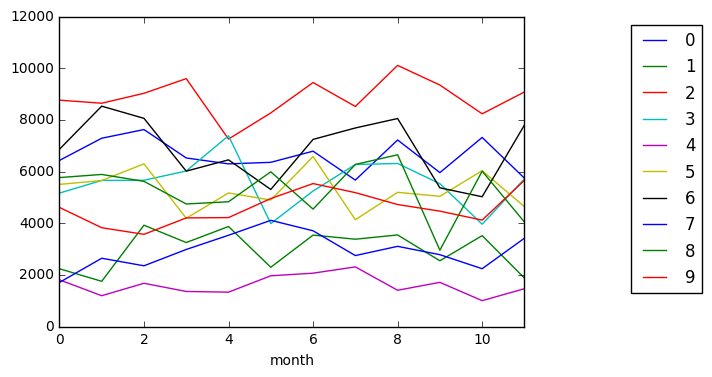

In [152]:
pivot = groupped.reset_index().pivot(index='month', columns='division', values='revenue')
print(pivot)
pivot.plot().legend(bbox_to_anchor=(1.4, 1))

In [153]:
cumsum = groupped.groupby(level=[0]).cumsum()
cumsum.head(18)

division  month
0         0         6428
          1        13716
          2        21339
          3        27863
          4        34158
          5        40513
          6        47300
          7        52967
          8        60187
          9        66144
          10       73462
          11       79204
1         0         2236
          1         3985
          2         7906
          3        11156
          4        15027
          5        17320
Name: revenue, dtype: int64

In [90]:
# Append column to original dataset
flat = groupped.reset_index()
flat.groupby(['division'])['revenue'].apply(lambda x: x.cumsum())
flat['cumsum'] = flat.groupby(['division'])['revenue'].apply(lambda x: x.cumsum())
flat.head(18)

,division,month,revenue,cumsum
0,0,0,6428,6428
1,0,1,7288,13716
2,0,2,7623,21339
3,0,3,6524,27863
4,0,4,6295,34158
5,0,5,6355,40513
6,0,6,6787,47300
7,0,7,5667,52967
8,0,8,7220,60187
9,0,9,5957,66144


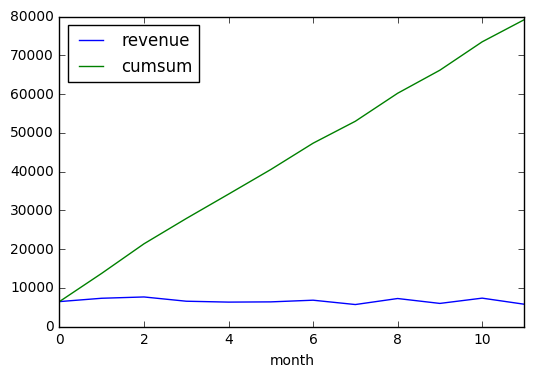

In [157]:
flat[flat['division']==0].plot(kind='line', x=['month'], y=['revenue', 'cumsum'])


In [123]:
# TODO rolling sum over two month
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html
#groupped.groupby(level=[0]).rolling(2).sum()
flat_roll = groupped.copy().reset_index()
flat_roll['roll'] = flat_roll.groupby(['division']).rolling(2, min_periods=1).sum().reset_index(drop=True)['revenue']
flat_roll.head(18)

,division,month,revenue,roll
0,0,0,6428,6428
1,0,1,7288,13716
2,0,2,7623,14911
3,0,3,6524,14147
4,0,4,6295,12819
5,0,5,6355,12650
6,0,6,6787,13142
7,0,7,5667,12454
8,0,8,7220,12887
9,0,9,5957,13177


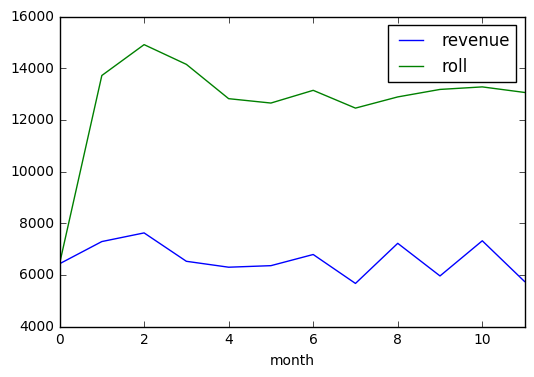

In [158]:
flat_roll[flat_roll['division']==0].plot(kind='line', x=['month'], y=['revenue', 'roll'])